In [ ]:
# langchain or langgraph ka pass apna chat model ni hai s lia hum na frist of all hum chat ka lia google llm ko use kryn ga s ka lia hum chatgpt and  etropy etc
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    api_key=GEMINI_API_KEY,
    temperature=0
)
result  = llm.invoke("What is open AI SDK?")
print(result)

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    api_key=GEMINI_API_KEY,
    temperature=0
)
msg = [HumanMessage(content = 'hi' , name ="amina"), 
    AIMessage(content = 'hi amina how are you', name = "gemini"),
    HumanMessage(content = 'i am fine', name = "amina"),
    AIMessage(content = 'what is python', name = "gemini")
]
massages = [msg]
# llm = llm.bind_messages(massages)
result  = llm.invoke("what is python?")
print(result)

In [23]:

import os
from dotenv import load_dotenv

load_dotenv()
Tavily_Api_Key = os.getenv('Tavily_Api_Key')

In [24]:
from langchain_tavily import TavilySearch

tool = TavilySearch(
    max_results=5,
    topic="general"
)

In [26]:
tool.invoke({"query": "What is openai SDK?"})

{'query': 'What is openai SDK?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://getstream.io/blog/openai-agents-sdk/',
   'title': 'OpenAI Agents SDK — Getting Started - GetStream.io',
   'content': 'The latest open-source SDK provides developers a robust toolkit for building and deploying AI agents. The OpenAI Agents SDK is built upon four fundamental principles that work together to create robust, reliable AI systems. These four principles work together to create a robust framework that enables developers to build sophisticated, reliable AI agent systems while maintaining control and visibility throughout the process. # Output: No, AI agents are not sentient. The first thing we define is an output type and a `guardrail_agent`: Build a SaaS AI Agent PlatformCompare the 3 Best Agentic CLI Coding ToolsBuild an AI Meeting Assistant with Stream Video and LLMsBuilding a Personalized AI Chatbot with Stream’s UI ComponentsLLM Context Protocols: Ag

In [ ]:
from typing_extensions import TypedDict
class LearnningState(TypedDict):
    prompt: str
    output : str



In [ ]:
lahore_state = LearnningState(prompt = " hello from itu lahore")
# print(lahore_state)

In [ ]:
print(lahore_state['prompt'])
print(lahore_state['prompt'] + " i am from lahore")
print(lahore_state)

hello from itu lahore?
hello from itu lahore?i am from lahore
{'prompt': 'hello from itu lahore?'}


In [ ]:
def node1(state: LearnningState):
    print(state['prompt'])
    state['prompt'] = state['prompt'] + " i am from lahore"
    return state
def node2(state: LearnningState):
    print(state['prompt'] + "  i am happy")
    return state

In [33]:
from IPython .display import display,Image
from langgraph.graph import START, StateGraph, END
from langgraph.graph.state import CompiledStateGraph

builder = StateGraph(state_schema= LearnningState)

In [34]:
add_node1 = builder.add_node(
    "node1" , node1)
add_node2 = builder.add_node(
    "node2" , node2)

In [35]:
builder.add_edge(START, "node1")     
builder.add_edge("node1", "node2")
builder.add_edge("node2", END)  

In [36]:
graph : CompiledStateGraph = builder.compile()

In [37]:
print(graph)

In [38]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node1': Node(id='node1', name='node1', data=node1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'node2': Node(id='node2', name='node2', data=node2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='node1', data=None, conditional=False), Edge(source='node1', target='node2', data=None, conditional=False), Edge(source='node2', target='__end__', data=None, conditional=False)])


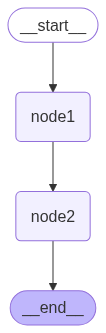

In [39]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
graph.invoke({"prompt":"hello"})

hello
helloi am from lahorem happy


{'prompt': 'helloi am from lahore'}